In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns



In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:


file_path = r'C:\Users\vinay\OneDrive\Desktop\AspireNex_MOVIE-RATING-PREDICTION-WITH-PYTHON\data.csv'

# Replace 'latin1' with the actual encoding of your CSV file if known
df = pd.read_csv(file_path, encoding='latin1')

print(df.head())




                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [61]:
print(df.columns)

Index(['Rating_binned'], dtype='object')


In [58]:
# Ensure column names match exactly
columns_to_drop = ['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre']
df.drop(columns=columns_to_drop, axis=1, inplace=True)



KeyError: "['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'] not found in axis"

C:\Users\vinay\AppData\Local\Temp\ipykernel_28876\2172348570.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Rating_binned']).size().plot(kind="bar", fontsize=14)


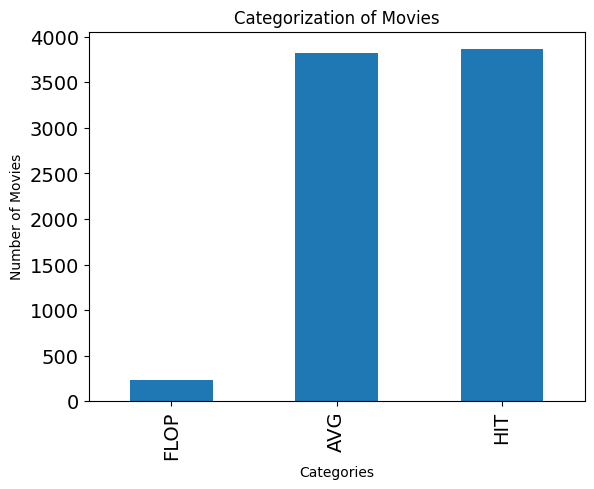

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = r'C:\Users\vinay\OneDrive\Desktop\AspireNex_MOVIE-RATING-PREDICTION-WITH-PYTHON\data.csv'

# Try reading the CSV with the correct encoding and delimiter
try:
    df = pd.read_csv(file_path, encoding='latin1', delimiter=',', on_bad_lines='warn')
    
    # Strip whitespace from column names
    df.columns = df.columns.str.strip()
    
    # Drop rows with missing 'Name' as they are likely invalid
    df = df.dropna(subset=['Name'])
    
    # Ensure the 'Rating' column is numeric
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
    
    # Define bins and labels for categorization
    bins = [1, 3, 6, 10]
    labels = ['FLOP', 'AVG', 'HIT']
    
    # Categorize the 'Rating' column
    df['Rating_binned'] = pd.cut(df['Rating'], bins=bins, labels=labels)
    
    # Group by the categorized 'Rating_binned' column and plot
    df.groupby(['Rating_binned']).size().plot(kind="bar", fontsize=14)
    plt.xlabel('Categories')
    plt.ylabel('Number of Movies')
    plt.title('Categorization of Movies')
    plt.show()
    
except Exception as e:
    print(f"Error reading the file: {e}")


In [16]:
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Rating_binned
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,NaN
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,HIT
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,NaN
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,AVG
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,NaN


In [52]:
df.shape

(5659, 1)

In [19]:
#Total null values present in each column
df.isnull().sum()

Name                0
Year              528
Duration         8269
Genre            1877
Rating           7590
Votes            7589
Director          525
Actor 1          1617
Actor 2          2384
Actor 3          3144
Rating_binned    7590
dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Rating_binned
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,HIT
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,AVG
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,AVG
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,HIT
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,AVG


In [48]:
df.shape

(5659, 1)


In [25]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Rating_binned'],
      dtype='object')

In [26]:
df.describe(include='object')

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659,5659,5659,5659,5659,5659,5659,5659,5659
unique,5385,91,174,376,2027,2431,1960,2321,2556
top,Baazi,(2019),120 min,Drama,7,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,227,169,844,90,41,104,52,57


In [31]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and you have the following columns
columns_to_encode = ['Name', 'Year', 'Duration', 'Genre', 'Rating', 
                     'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply label encoding to each column in 'columns_to_encode' of 'df'
df[columns_to_encode] = df[columns_to_encode].apply(lambda x: le.fit_transform(x.astype(str)))

# Print the transformed DataFrame
print(df.head())


   Name  Year  Duration  Genre  Rating  Votes  Director  Actor 1  Actor 2  \
1     0    88         9    229      57   1843       629     1352     2272   
3     1    88        10    184      31   1164      1335     1198      719   
5     3    66        47    157      34   1892      1530      378       75   
6     4    74        42    289      61     34      2044      692     1112   
8    76    81       156    320      43   1133       135     1934     1175   

   Actor 3 Rating_binned  
1      319           HIT  
3     2148           AVG  
5     2045           AVG  
6     2524           HIT  
8     1013           AVG  


In [50]:
df.shape

(5659, 1)

In [33]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Rating_binned
1,0,88,9,229,57,1843,629,1352,2272,319,HIT
3,1,88,10,184,31,1164,1335,1198,719,2148,AVG
5,3,66,47,157,34,1892,1530,378,75,2045,AVG
6,4,74,42,289,61,34,2044,692,1112,2524,HIT
8,76,81,156,320,43,1133,135,1934,1175,1013,AVG


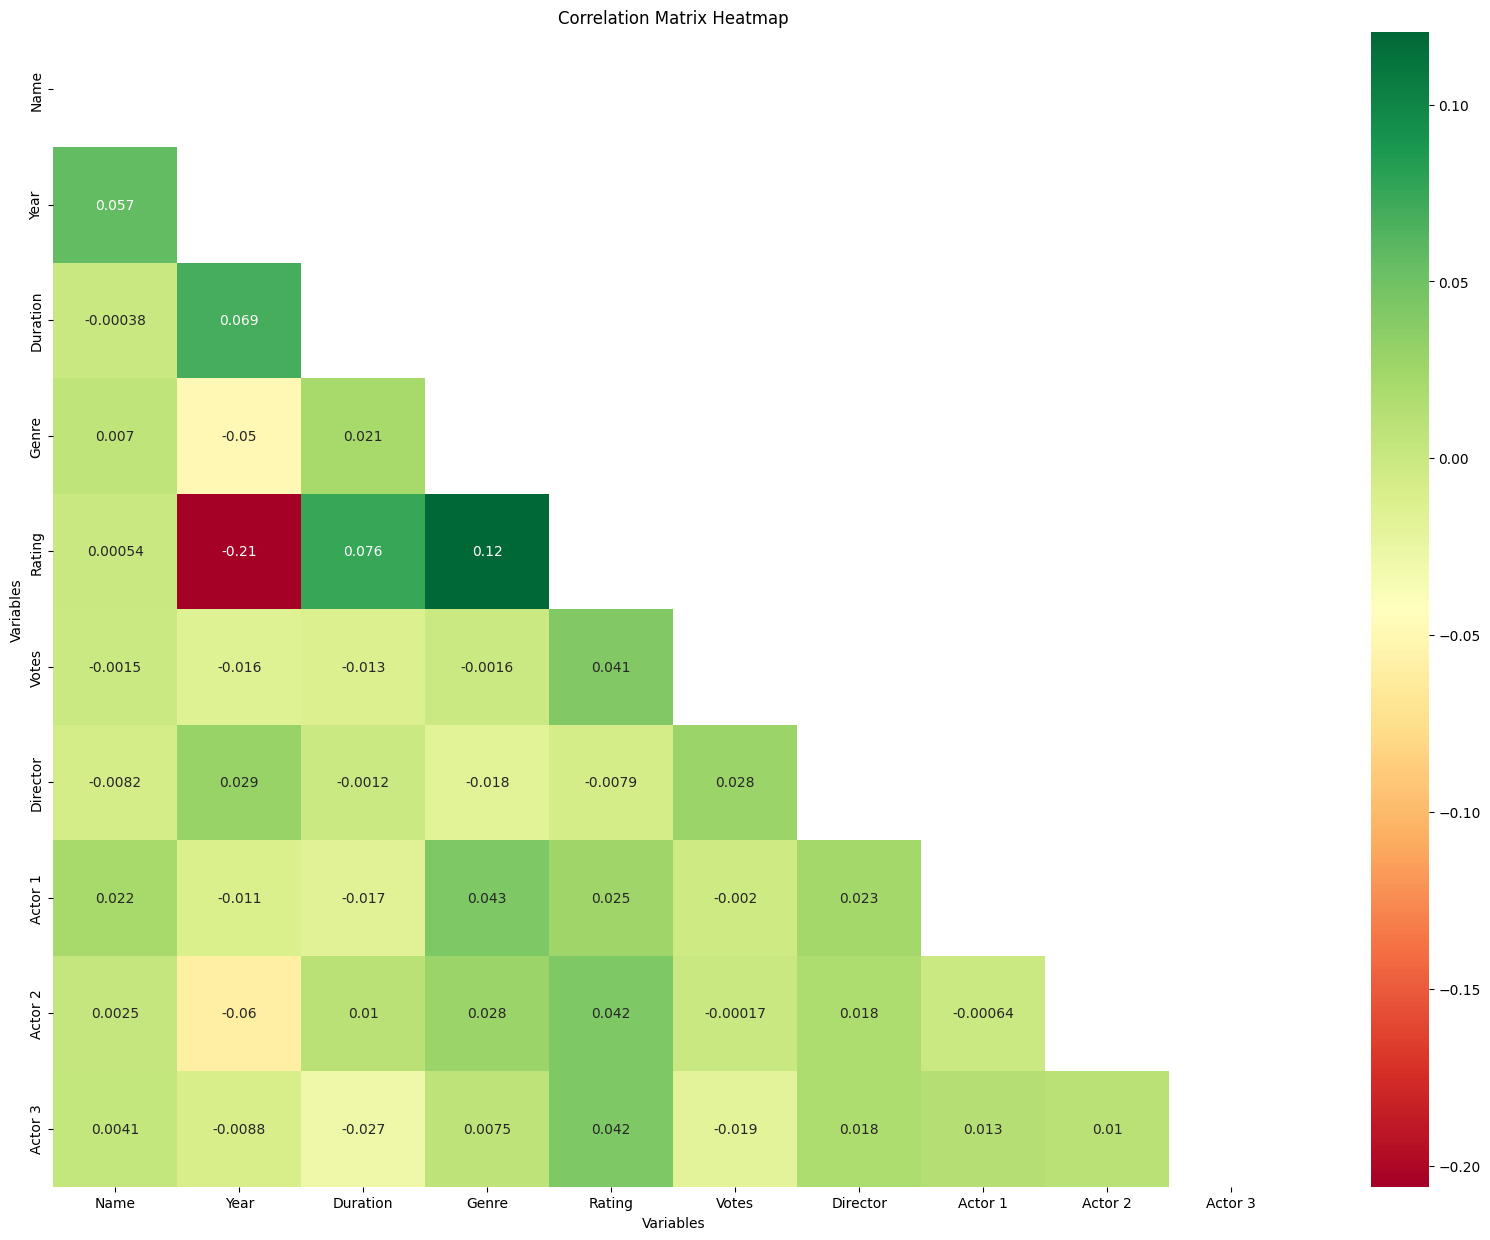

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame after label encoding
# Filter out non-numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Compute correlation matrix for numeric columns
corr = df[numeric_cols].corr()

# Create a mask to hide the upper triangle of the heatmap
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='RdYlGn', 
            xticklabels=corr.columns, yticklabels=corr.columns, 
            mask=mask)

# Customize labels and title
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.title('Correlation Matrix Heatmap')

# Display the plot
plt.show()


In [51]:
df.shape

(5659, 1)

In [40]:
import numpy as np

# Filter out numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Compute correlation matrix for numeric columns
corr_matrix = df[numeric_cols].corr().abs()

# Create a mask to ignore the diagonal and upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Find columns with correlation greater than 0.8
to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.8)]

# Drop the identified columns
df.drop(columns=to_drop, inplace=True)


In [49]:
df.shape



(5659, 1)